In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob 
import tensorflow as tf
import PIL
from PIL import ImageDraw

from tensorflow.keras import models
from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense,Flatten, Activation, BatchNormalization,Input,Add,ZeroPadding2D,AveragePooling2D,GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet_v2 import ResNet152V2,ResNet50V2, preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions


In [2]:
train_dir = 'D:\\빅데이터기반지능형서비스개발\\07기업요구사항기반의문제해결pjt\\tdata\\train'
labels=pd.Series(os.listdir(train_dir))
labels=labels.sort_values()
labels=labels.to_list()

image_height = 224  # 이미지 높이
image_width = 224   # 이미지 넓이
batch_size = 32     # batch size
epochs  = 20  # trining 횟수

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(image_width, image_height),
                                                 
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

Found 8446 images belonging to 4 classes.


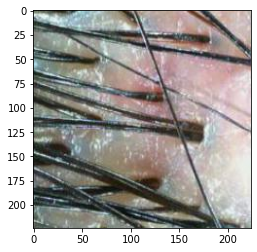

In [63]:
from matplotlib.pyplot import imshow

ii=np.zeros([224,224,1])
ii=train_set[0][0][-2]
imshow(ii)

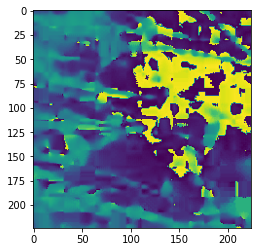

In [65]:
hsv = cv2.cvtColor(ii, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

imshow(h)

In [66]:
h

array([[ 90.000046,  90.000046,  90.00004 , ...,  31.999935,  31.999935,
         41.538364],
       [ 92.72731 ,  92.72731 ,  92.72731 , ...,  31.999935,  31.999935,
         41.538364],
       [103.33336 , 103.33336 , 103.33336 , ...,  31.999935,  27.692244,
         32.72714 ],
       ...,
       [ 85.71444 , 102.857216, 110.00005 , ..., 138.4615  , 142.49995 ,
        142.49995 ],
       [ 85.71444 , 102.857216, 110.00005 , ..., 138.4615  , 142.49995 ,
        138.74997 ],
       [ 85.71444 , 102.857216, 110.00005 , ..., 138.4615  , 138.74997 ,
        138.74997 ]], dtype=float32)

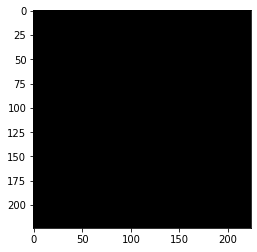

In [59]:
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(hsv, lower_red, upper_red)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(ii, lower_red, upper_red)
mask = mask0+mask1

ii[np.where(mask==0)] = 0

imshow(ii)

In [58]:
mask0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)